# 신용점수 예측(Credit score analysis)

## 문제 상황  

A사는 매 년 다른 신용평가사의 신용점수 Data를 구입하여 사용하고 있다. 해당 Data를 사용함에 따라 발생하는 라이센스 비용이 만만치 않다.  
따라서 A사는 이번 년도 신규프로젝트의 일환으로 자사의 Data를 활용하여 신용점수를 예측하는 모형을 만들고자 한다.

## 문제 해결 프로세스  

1. 문제정의

- 신용평가 모델 부재로 인해 발생하는 과다한 라이센스 비용

2. 기대효과

- 자사 신용평가 모델을 활용 라이센스 비용 절감  

3. 해결방안

- 자사 Data 활용 신용평가 모델 생성 및 활용 

4. 성과측정

- 매년 라이센스 비용 절감 금액

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('C:/Users/USER/Desktop/Practice Project/신용점수 예측/신용점수 예측.csv')
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [3]:
df.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [4]:
print("총 결측치 수: {} = 전체 데이터의 {:.2f}%".format(df.isnull().sum().sum(), (df.isnull().sum().sum()*100)/(df.shape[0]*df.shape[1])))

총 결측치 수: 105653 = 전체 데이터의 5.53%


#### 변수 해석 3가지  

1. 결측치 존재 여부

- 전체 데이터에서 모든 변수에 결측치가 존재한다.

- 결측치의 개수는 전체 5%를 넘는 105653개이다.

- 결측치를 대체하는 경우, object형태는 최빈값으로 대체하고, float64형태는 평균으로 대체하거나 KNN을 사용할 수 있다.

- 하지만, 결측치의 개수가 전체 데이터에 비해 5%를 넘기 때문에 대체하는 것이 좋아보이나 Credit score가 없는 데이터는 활용할 수 없으므로 최대한 제거하는 방법을 선택해야한다.

2. 데이터 타입 설명

- 종속변수는 float64형태, 독립변수는 object, float64형태로 구성되어 있다. 독립변수 object타입은 인코딩을 통하여 변환해줄 필요가 있어보인다.  

3. 컬럼 설명

- Loan ID : 대출 ID
- Customer ID : 고객 ID
- Loan Status : 대출상태
- Current Loan Amount : 현재 대출잔액
- Term : 대출기간
- Credit Score : 신용점수
- Annual Income : 연수입
- Years in current job : 직업년차
- Home Ownership : 자가여부
- Purpose : 대출목적
- Monthly Debt : 월상환금액
- Years of Credit History : 신용기록
- Months since last delinquent : 마지막 연체이후 개월
- Number of Open Accounts : 유효계좌수
- Number of Credit Problems : 신용불량건수
- Current Credit Balance : 현재신용한도
- Maximum Open Credit : 최대신용한도
- Bankruptcies : 파산여부
- Tax Liens : 세금유치권

In [4]:
df=df.dropna(subset=['Credit Score','Years in current job', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']) 
df['Months since last delinquent'].fillna(0.0, inplace=True)

Target data는 신용점수(Credit Score)가 없는 데이터는 활용할 수 없으므로 제거한다

In [5]:
df.isnull().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [6]:
df[df['Customer ID']=='981165ec-3274-42f5-a3b4-d104041a9ca9']

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,0.0,6.0,1.0,228190.0,416746.0,1.0,0.0
38854,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,0.0,6.0,1.0,228190.0,416746.0,1.0,0.0


첫번째 값을 기준으로 고객 ID 기준 중복 확인한 결과, 위와 같이 중복값이 존재하기 때문에 중복값을 제거해준다 

In [7]:
df.drop_duplicates(['Customer ID'], keep = 'first', inplace=True)

중복값 제거할 때, keep을 보통 first, last 설정은 데이터가 소수점도 많고 정확한 기준의 데이터로 설정된다. 위의 데이터는 2개의 데이터가 같기 때문에 first로 남기는 것이다

In [9]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,6.405500e+04,64055.000000,6.405500e+04,64055.000000,64055.000000,64055.000000,64055.000000,64055.000000,6.405500e+04,6.405500e+04,64055.000000,64055.000000
mean,1.479689e+07,1148.426196,1.397553e+06,18630.081894,18.062699,16.090438,11.189852,0.157911,2.966310e+05,7.641964e+05,0.110327,0.027757
std,3.512832e+07,1599.706075,1.127272e+06,12237.329141,6.816177,22.907440,5.006026,0.471562,3.809407e+05,7.656539e+06,0.340704,0.257484
min,1.542200e+04,585.000000,7.662700e+04,0.000000,3.700000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.915760e+05,710.000000,8.617830e+05,10413.140000,13.400000,0.000000,8.000000,0.000000,1.150070e+05,2.806650e+05,0.000000,0.000000
50%,3.252920e+05,730.000000,1.199698e+06,16347.410000,16.900000,0.000000,10.000000,0.000000,2.128000e+05,4.786100e+05,0.000000,0.000000
75%,5.496480e+05,743.000000,1.675135e+06,24122.590000,21.500000,29.000000,14.000000,0.000000,3.706045e+05,7.986330e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


우선 describe로 이상치를 판단하기 위해서는 mean, min, max 값을 확인하는 것이 좋다. mean과 min, mean과 max 값이 std에 비해 한참 차이가 난다면, 이상치가 있을 가능성이 높다. 이러한 이상치를 정확히 판단하기 위해서는 아래와 같이 boxplot으로 시각화하여 보는 것이 정확하다.

In [8]:
df_n = df.select_dtypes(exclude = 'object')

In [14]:
outlier = pd.melt(df_n, var_name = '이상치 탐색 변수', value_name = '이상치 탐색 값')
outlier

,이상치 탐색 변수,이상치 탐색 값
0,Current Loan Amount,445412.0
1,Current Loan Amount,99999999.0
2,Current Loan Amount,347666.0
3,Current Loan Amount,206602.0
4,Current Loan Amount,217646.0
...,...,...
768655,Tax Liens,0.0
768656,Tax Liens,0.0
768657,Tax Liens,0.0
768658,Tax Liens,0.0


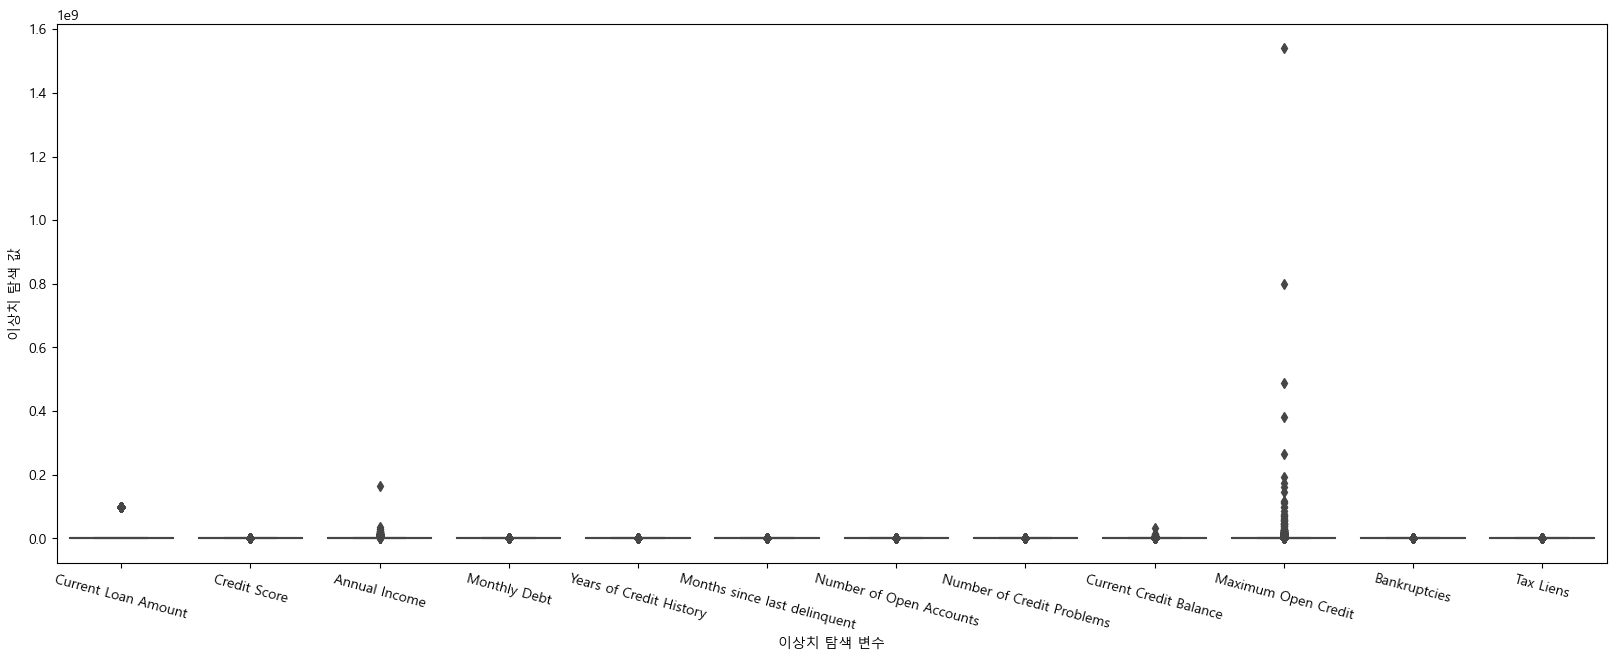

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
rc("font", family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize = (20,7))
sns.boxplot(x = '이상치 탐색 변수', y = '이상치 탐색 값', data = outlier)
plt.xticks(range(12), df_n.columns)
plt.xticks(rotation=-15)
plt.show()

이상치를 탐색하기 위해서 수치형 변수들만 선택해서 boxplot으로 시각화하였다. 이상치의 값이 연속적으로 나타나면, 보통 의미있는 값일 확률이 높기 때문에 따로 제거하거나 대체하지 않고, 눈에 띄는 이상치가 있을 경우에는 보통 제거하거나 대체하는 경우가 많다.(예를 들어, Age 변수가 999값이 있으면 제거하거나 대체하는 것이 옳다.)

In [14]:
df.shape

(64055, 19)

결측치와 중복 데이터 제거로 인해 데이터의 개수가 많이 줄어든 것을 확인할 수 있다

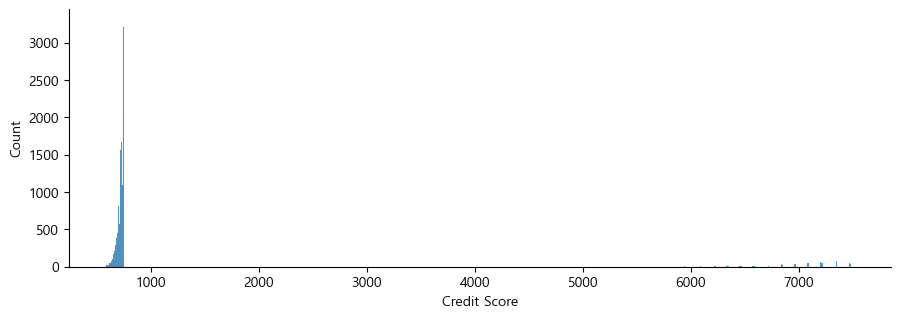

In [15]:
sns.displot(df['Credit Score'])
plt.gcf().set_size_inches(10, 3)

displot은 count 기반으로 수를 나타내주는 시각화 함수이다

In [16]:
df['Credit Score'].describe()

count    64055.000000
mean      1148.426196
std       1599.706075
min        585.000000
25%        710.000000
50%        730.000000
75%        743.000000
max       7510.000000
Name: Credit Score, dtype: float64

In [9]:
df = df[df['Credit Score']<=1000]
df.shape

(59761, 19)

신용점수가 1,000점 만점으로 가정했을때, 그 이상의 데이터는 오류가 있는 데이터일 확률이 높기 때문에 제거한다

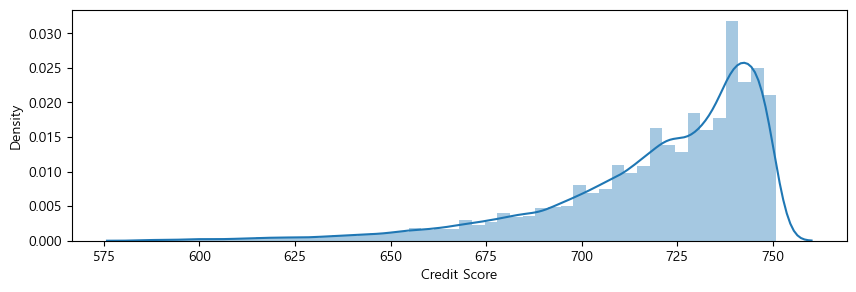

In [18]:
sns.distplot(df['Credit Score'])
plt.gcf().set_size_inches(10, 3)

distplot은 밀도 기반으로 데이터의 분포가 어느쪽에 위치하는지 확인하는 시각화 함수이다  

신용점수를 1,000점 기준으로 재설정하고 데이터 분포를 재확인한다. 대부분이 700점대에 존재하는 것을 확인할 수 있다

## 신용점수 영향인자 분석(수치형 변수)

In [10]:
numeric_list=[]
categoical_list=[]

for i in df.columns :
    if df[i].dtypes == 'O' :
        categoical_list.append(i)
    else :
        numeric_list.append(i)

print("categoical_list :", categoical_list)
print("")
print("numeric_list :", numeric_list)

categoical_list : ['Loan ID', 'Customer ID', 'Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']

numeric_list : ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']


In [22]:
df[numeric_list].head(3)

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,445412.0,709.0,1167493.0,5214.74,17.2,0.0,6.0,1.0,228190.0,416746.0,1.0,0.0
2,99999999.0,741.0,2231892.0,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,347666.0,721.0,806949.0,8741.90,12.0,0.0,9.0,0.0,256329.0,386958.0,0.0,0.0


PearsonRResult(statistic=0.08182908654881717, pvalue=2.611517364358156e-89)


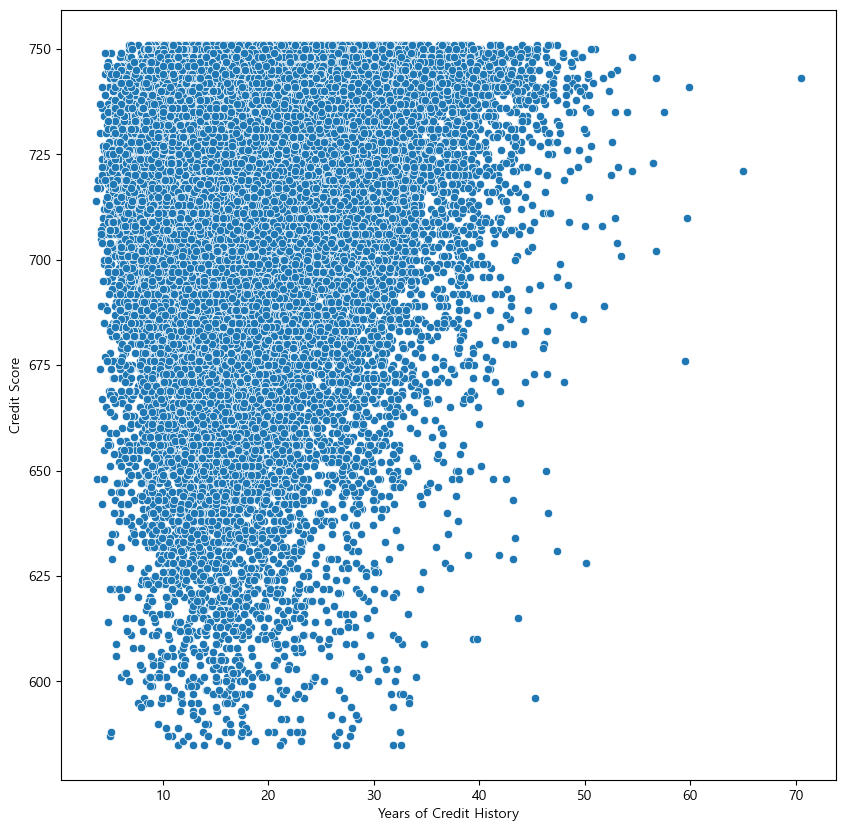

In [16]:
import scipy.stats as stats
val='Years of Credit History'


sns.scatterplot(df[val], df['Credit Score']);
print(stats.pearsonr(df[val], df['Credit Score']))
plt.gcf().set_size_inches(10, 10)

Years of Credit History(신용기록)과 신용점수와의 상관계수를 확인한다. p-value값이 0.05보다 작으므로 유의하나 상관계수값이 0.08로 거의 상관계수가 없다고 할 수 있는 값이다

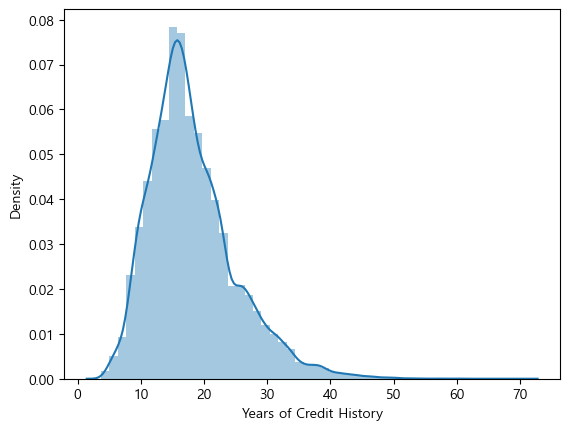

In [24]:
sns.distplot(df[val]);

Years of Credit History(신용기록)의 분포를 확인한다

In [26]:
import numpy as np
df['gp'] = np.where (df[val] <= 10, 1, 
                           np.where(df[val] <= 20, 2, 3))

df[[val,'gp']]

,Years of Credit History,gp
0,17.2,2
2,14.9,2
3,12.0,2
6,19.6,2
8,22.6,3
...,...,...
99990,20.1,3
99994,17.4,2
99996,9.4,1
99997,18.8,2


10, 20 사이의 값을 평균으로 측정하고 3개의 구간으로 구간화를 진행한다

In [27]:
df.groupby('gp')['Credit Score'].mean()

gp
1    714.098887
2    719.841905
3    722.612636
Name: Credit Score, dtype: float64

상관계수(0.08)에서 예상할 수 있었다시피, 큰 차이점이 없는 것을 알 수 있다. 나머지 수치형 변수 확인 결과, Years of Credit History(신용기록) 변수가 가장 높은 상관성을 띄고 있었다. 따라서, 수치형 변수에서 유의미한 변수는 존재하지 않는다

## 신용점수 영향인자 분석(범주형 변수)

In [32]:
df_c = df[categoical_list].iloc[:, 2:]
df_c

,Loan Status,Term,Years in current job,Home Ownership,Purpose
0,Fully Paid,Short Term,8 years,Home Mortgage,Home Improvements
2,Fully Paid,Short Term,8 years,Own Home,Debt Consolidation
3,Fully Paid,Long Term,3 years,Own Home,Debt Consolidation
6,Fully Paid,Short Term,< 1 year,Home Mortgage,Debt Consolidation
8,Fully Paid,Short Term,2 years,Rent,Debt Consolidation
...,...,...,...,...,...
99990,Fully Paid,Short Term,< 1 year,Rent,other
99994,Fully Paid,Short Term,1 year,Home Mortgage,Other
99996,Fully Paid,Short Term,1 year,Rent,Debt Consolidation
99997,Fully Paid,Short Term,6 years,Rent,Debt Consolidation


ID 값을 제거하고 분석을 진행한다

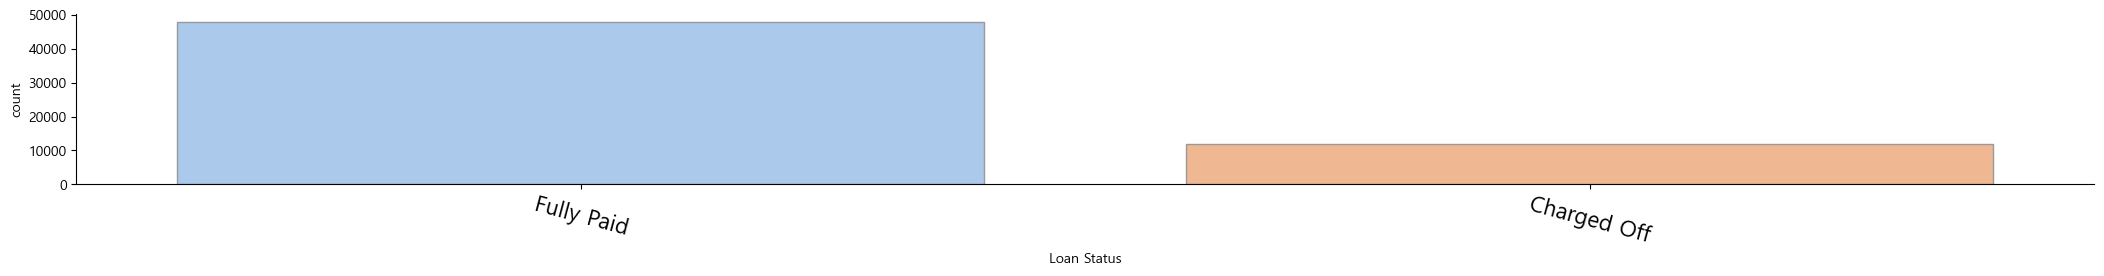

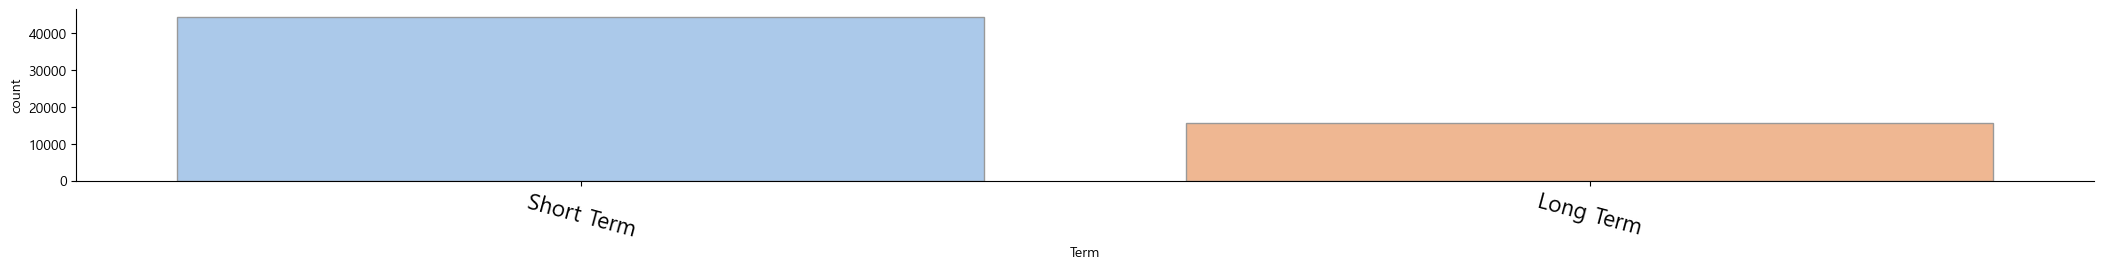

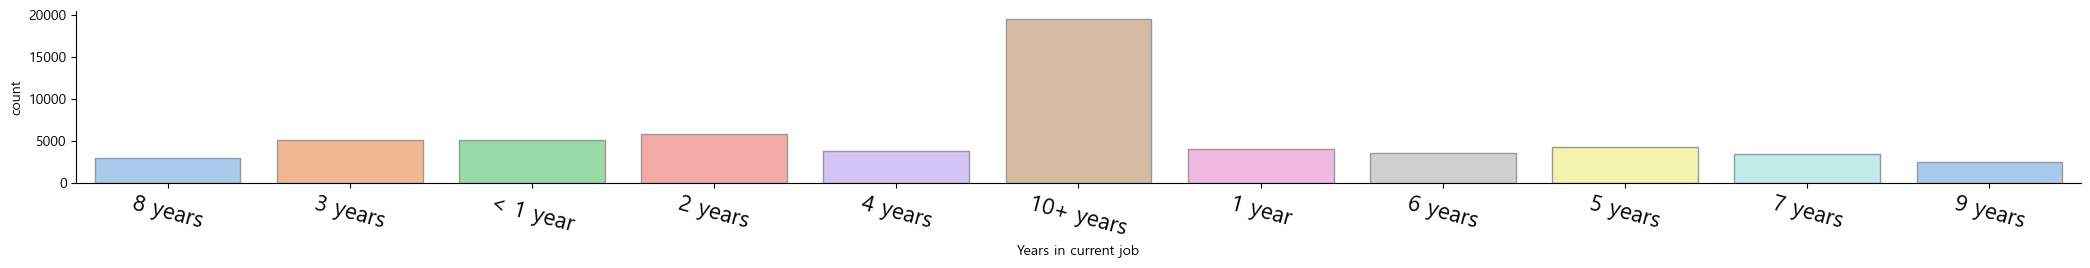

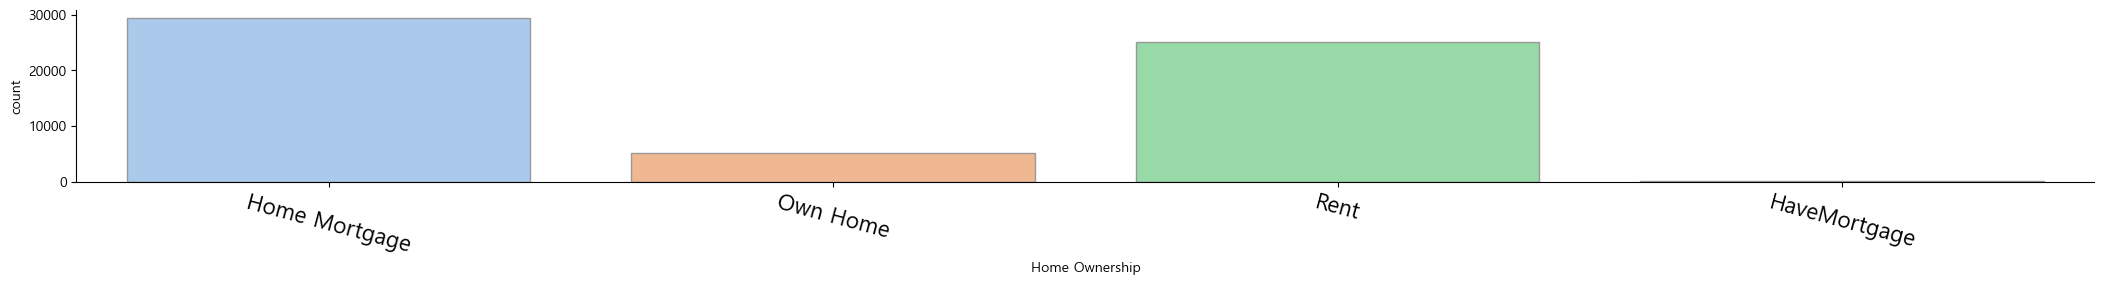

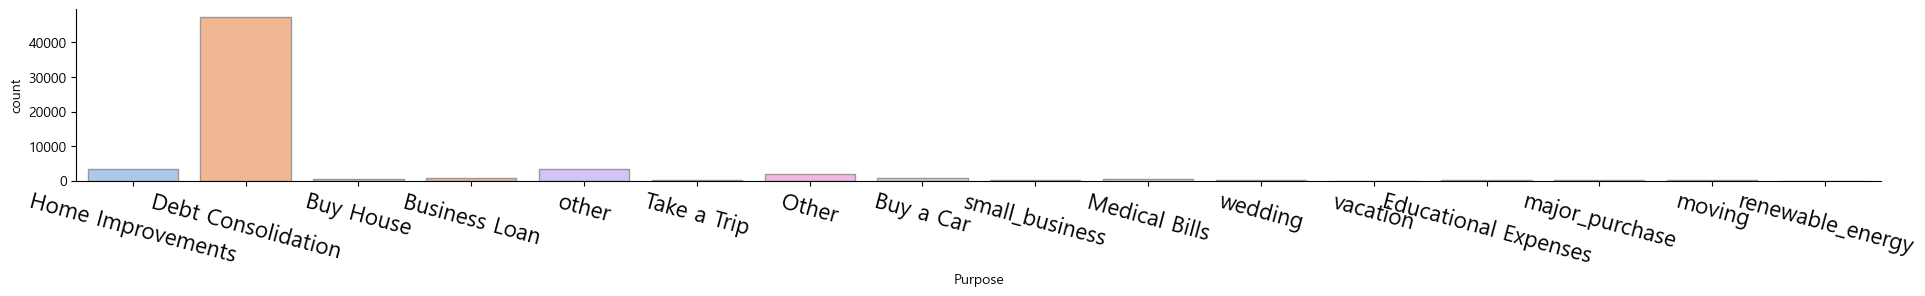

In [34]:
for i in df_c :
    sns.catplot(x=i, kind="count",palette="pastel", edgecolor=".6",data=df);
    plt.gcf().set_size_inches(25, 2);
    plt.xticks(fontsize=16);
    plt.xticks(rotation=-15)

In [35]:
for i in categoical_list[2:] :
    print(df.groupby(i)['Credit Score'].mean().sort_values(ascending=False))
    print('')
    print('-------------------------------------')

Loan Status
Fully Paid     722.800443
Charged Off    709.825839
Name: Credit Score, dtype: float64

-------------------------------------
Term
Short Term    728.125189
Long Term     697.727308
Name: Credit Score, dtype: float64

-------------------------------------
Years in current job
1 year       721.161307
< 1 year     720.933871
2 years      720.796908
3 years      720.536819
4 years      720.517060
8 years      720.314365
6 years      720.281515
5 years      720.247259
7 years      719.727642
9 years      719.636364
10+ years    719.634629
Name: Credit Score, dtype: float64

-------------------------------------
Home Ownership
Home Mortgage    721.693731
HaveMortgage     720.576923
Own Home         719.113319
Rent             718.706197
Name: Credit Score, dtype: float64

-------------------------------------
Purpose
Buy a Car               728.040201
major_purchase          725.208333
Educational Expenses    724.844828
Home Improvements       721.773272
Debt Consolidation      7

위의 데이터를 살펴본 결과, Term(대출기간)과 Purpose(대출목적)를 제외하고 다른 변수들에서 유의미한 차이가 보이지는 않는다. Term에서 Short Term(단기대출)이 신용점수가 더욱 높고, Purpose에서 Buy a Car(차량구매목적)가 신용점수가 가장 높은 것을 알 수 있다

## ML 활용 신용점수 예측

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

X=df.drop(['Loan ID', 'Customer ID', 'gp', 'Credit Score'], axis=1)
Y=df['Credit Score']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(41832, 16)
(41832,)
(17929, 16)
(17929,)


- 데이터 분리할 때, 분류분석은 stratify를 통해 층화추출하고 회귀분석은 동일한 비율로 나눌수가 없기 때문에 stratify 옵션을 사용하지 않는다

- 보통 데이터 행의 개수와 비슷한 차원이 있는 컬럼은 제거하고 모델링 하는 것이 좋다. 예를 들어, id 같은 것들. 각각의 값이 전부 유니크하면 제거한다

- 새로 만든 파생변수나 기존 컬럼과 동일한 의미의 컬럼들도 제거한다

- 범주형 변수의 값이 3-4개가 적당하고 20개가 넘는 변수는 보통 삭제하고 모델링하는게 좋은데, 처음에는 어떤 변수가 중요한지 모르니 일단 전부 투입시키고 하는게 좋다. 이러한 경우, 범주형 변수들을 인코딩 하면 차원이 워낙 많다보니까 오류 방지 차원에서 train과 test의 값을 합쳐서 만들고 fit 시켜줘야한다

- 분석 시간이 많다 = 범주형 변수들을 하나하나 제거해보면서 모델링

- 분석 시간이 없다 = 효율성을 위해 train과 test의 값을 한번에 fit해서 모델링

In [37]:
categoical_list.remove('Loan ID')
categoical_list.remove('Customer ID')

사용하지 않을 list는 사전에 제거하고 인코딩 준비를 마친다

In [38]:
from sklearn.preprocessing import LabelEncoder

for col in categoical_list:
    print(col, " - completed")
    le = LabelEncoder()
    le.fit(list(x_train[col].values) + list(x_test[col].values))
    x_train[col] = le.transform(x_train[col])
    x_test[col] = le.transform(x_test[col])

Loan Status  - completed
Term  - completed
Years in current job  - completed
Home Ownership  - completed
Purpose  - completed


범주형 변수는 One-hot-encoding 또는 Label-encoding을 통해 숫자형 변수로 변경해야한다. One-hot-encoding은 차원이 많은 변수에는 적절하지 않고, Label-encoding은 차원이 많은 변수에 유용하기 때문에 Label-encoding을 진행한다

In [39]:
x_train[categoical_list].head(3)

,Loan Status,Term,Years in current job,Home Ownership,Purpose
23547,1,1,7,3,3
87675,1,1,10,1,1
10027,1,1,2,3,3


In [40]:
x_test[categoical_list].head(3)

,Loan Status,Term,Years in current job,Home Ownership,Purpose
7032,1,0,1,1,3
49840,1,1,7,2,5
94513,1,1,2,3,11


In [41]:
rfr = RandomForestRegressor(n_estimators=100, max_depth=12)
rfr.fit(x_train, y_train)

RandomForestRegressor(max_depth=12)

In [42]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
y_pred_train = rfr.predict(x_train)
y_pred_test = rfr.predict(x_test)


mae_train = mean_absolute_error(y_train, y_pred_train)
print('mae_train(mae): ', mae_train)
r2_train = r2_score(y_train, y_pred_train)
print('r2_score(r2): ', r2_train)
print('')
mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)
r2_test = r2_score(y_test, y_pred_test)
print('r2_score(r2): ', r2_test)

mae_train(mae):  13.33208740866774
r2_score(r2):  0.593023612774441

mae_test(mae):  16.1107996370775
r2_score(r2):  0.38782567087510433


단순히 mae를 보고 16점밖에 차이가 나지 않는다고 생각할 수 있지만, 그래프를 그려보면 실제로 차이가 많이나는 값들이 있을 수도 있기 때문에 주의가 필요하다  

r2의 값이 차이가 크므로 과적합이 발생했다고 할 수 있다. 하지만, 어느정도의 설명력이 받춰줘야하기에 최대한 파라미터 조정을 한 결과이다

In [43]:
result = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_test})
result['diff'] = result['Real Values'] - result['Predicted Values']
result

,Real Values,Predicted Values,diff
7032,672.0,696.105158,-24.105158
49840,708.0,729.337404,-21.337404
94513,722.0,716.105362,5.894638
88228,745.0,729.015530,15.984470
59090,748.0,745.014695,2.985305
...,...,...,...
53250,720.0,703.555208,16.444792
13006,692.0,716.167100,-24.167100
19080,708.0,717.930233,-9.930233
71097,675.0,674.865944,0.134056


In [44]:
result.sort_values(by=['diff'], ascending = False)

,Real Values,Predicted Values,diff
18828,741.0,667.889989,73.110011
15097,721.0,651.585551,69.414449
96046,747.0,682.770422,64.229578
110,719.0,655.823586,63.176414
20961,735.0,674.751999,60.248001
...,...,...,...
8723,612.0,726.977385,-114.977385
17401,605.0,725.102754,-120.102754
24322,589.0,709.951995,-120.951995
17265,600.0,723.895742,-123.895742


예측값과 실제값 비교한 결과, 신용점수가 낮을수록 예측값과 실제값의 차이가 더욱 커지는 것을 알 수 있다

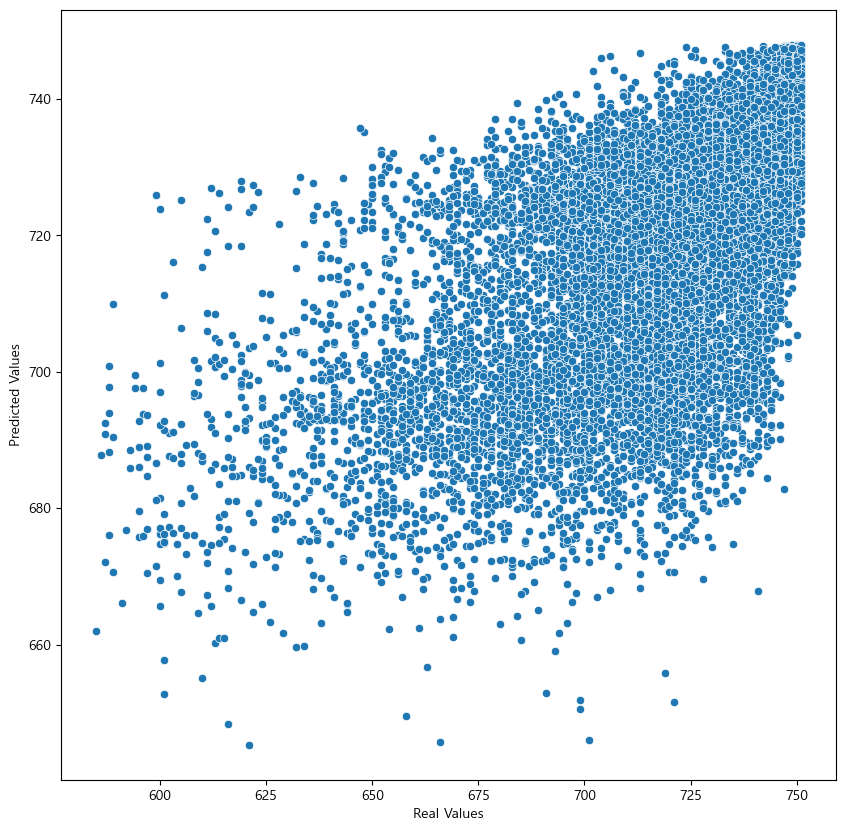

In [45]:
sns.scatterplot(result['Real Values'], result['Predicted Values'])
plt.gcf().set_size_inches(10 ,10)

신용점수가 낮을수록 Fitting이 잘 안되는 경향성을 보인다. 신용점수가 높을수록 잘 예측이 되고 낮을수록 예측이 잘 안되는 것을 보아 각각의 모델로 2개 만들어서 따로 모델링을 진행하는것도 좋다. 또는 다른 유의미한 변수를 생성해서 다시 분석을 진행해봐야한다. 단, 알고리즘 변경은 크게 달라지지 않기 때문에 유의미한 변수를 만드는것이 더욱 좋다

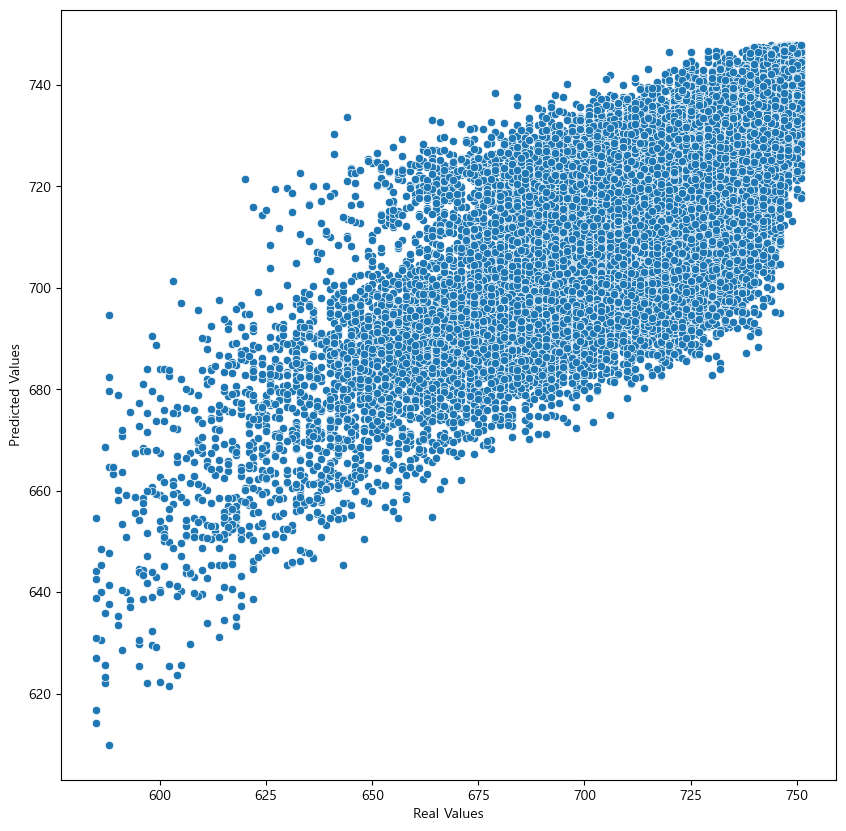

In [46]:
result = pd.DataFrame({'Real Values':y_train, 'Predicted Values':y_pred_train})
sns.scatterplot(result['Real Values'], result['Predicted Values'])
plt.gcf().set_size_inches(10 ,10)

Train set에서는 비교적 잘 Fitting 되어있는 것을 볼 수 있다

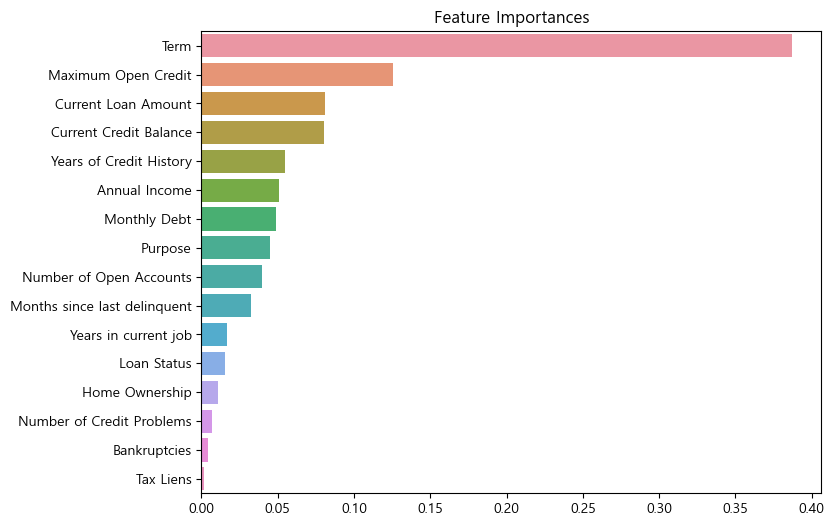

In [47]:
ftr_importances_values = rfr.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

Feature IMP 분석을 통해 중요변수를 파악한다. 위의 상위 변수를 살펴보면, Term(대출기간)이 신용점수를 예측하는데 가장 중요한 변수임을 확인할 수 있다. 하지만, Number of Credit Problems부터 하위 변수들은 예측에 거의 영향을 주지 않는 것을 알 수 있다. 따라서  Term(대출기간)을 주의 깊게 살펴가면서 예측을 진행하는 것이 좋은 판단이다

Number of Credit Problems부터 하위 변수들은 제거하고 다시 모델링 해보는 것도 좋다

In [20]:
df.groupby('Term')['Credit Score'].mean().sort_values(ascending = False)

Term
Short Term    728.125189
Long Term     697.727308
Name: Credit Score, dtype: float64

가장 중요한 변수에 대해 상세한 탐색을 실시한다. Term(대출기간)의 평균 분포를 확인한다. 한눈에 봐도 단기대출이 신용점수가 높다

<AxesSubplot:xlabel='Maximum Open Credit', ylabel='Density'>

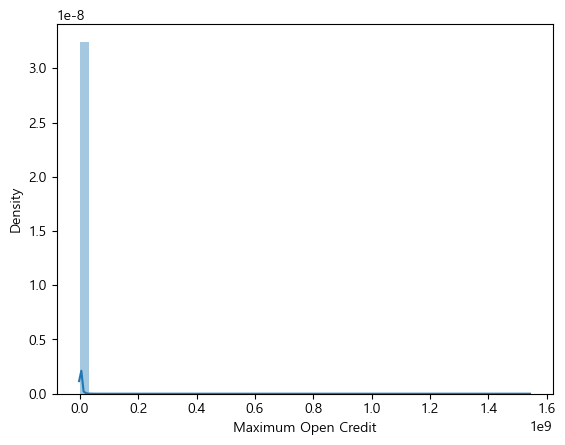

In [21]:
sns.distplot(df['Maximum Open Credit'])

2번째로 중요한 변수에 대해 상세한 탐색을 실시한다. Term(대출기간)은 object형태를 가지고 있어서 distplot을 사용한 분포 확인이 불가하여 2번째 중요변수인 Maximum Open Credit(최대신용한도)의 분포를 확인한다. 0.1*(1e9)쪽에 거의 대부분이 존재한다. 이러한 경우, describe를 통해 1사분위수와 3사분위수를 통해 구간화를 진행한다

In [23]:
df['Maximum Open Credit'].describe()

count    5.976100e+04
mean     7.728801e+05
std      7.908194e+06
min      0.000000e+00
25%      2.812920e+05
50%      4.813160e+05
75%      8.035940e+05
max      1.539738e+09
Name: Maximum Open Credit, dtype: float64

In [24]:
val = 'Maximum Open Credit'

import numpy as np
df['gp'] = np.where (df[val] <= 2.812920e+05, 1, 
                           np.where(df[val] <= 8.035940e+05, 2, 3))

df[[val,'gp']]

,Maximum Open Credit,gp
0,416746.0,2
2,750090.0,2
3,386958.0,2
6,272052.0,1
8,555038.0,2
...,...,...
99990,134442.0,1
99994,259160.0,1
99996,509234.0,2
99997,537548.0,2


1사분위수와 3사분위수를 통해 3개의 구간으로 구간화를 진행한다

In [25]:
df.groupby('gp')['Credit Score'].mean().sort_values(ascending = False)

gp
3    725.623670
2    719.692346
1    715.842380
Name: Credit Score, dtype: float64

대출기간보다 차이가 작지만, 최대신용한도가 클수록 신용점수가 높아지는 것을 확인할 수 있다. 따라서, 대출기간과 최대신용한도를 주의깊게 살펴봐야한다

성과측정은 기본 베이스 코드(위의 전체 코드)를 가지고 익월 데이터를 추가 업로드해서 성과비교가 필요하다. 예를 들어, 위의 데이터로 예측한 신용점수가 기존 라이센스에서 가져오는 신용점수의 차이를 비교해본다. 매년 라이센스 비용이 절감되는 금액을 살펴봐야한다